       AGE: -0.13011796413935317
       SEX: -13.890218586047503
       BMI: 8.221261460252105
        BP: 1.4253194842748804
Metrics Score: 0.42044107451894075
Name: LinearRegression
Metrics Score: 0.420
Name: ElasticNet
Metrics Score: 0.425
Name: Lasso
Metrics Score: 0.424
Name: Ridge
Metrics Score: 0.421
LinearRegression: mean of r2 scores=0.364
      ElasticNet: mean of r2 scores=0.363
           Lasso: mean of r2 scores=0.363
           Ridge: mean of r2 scores=0.364


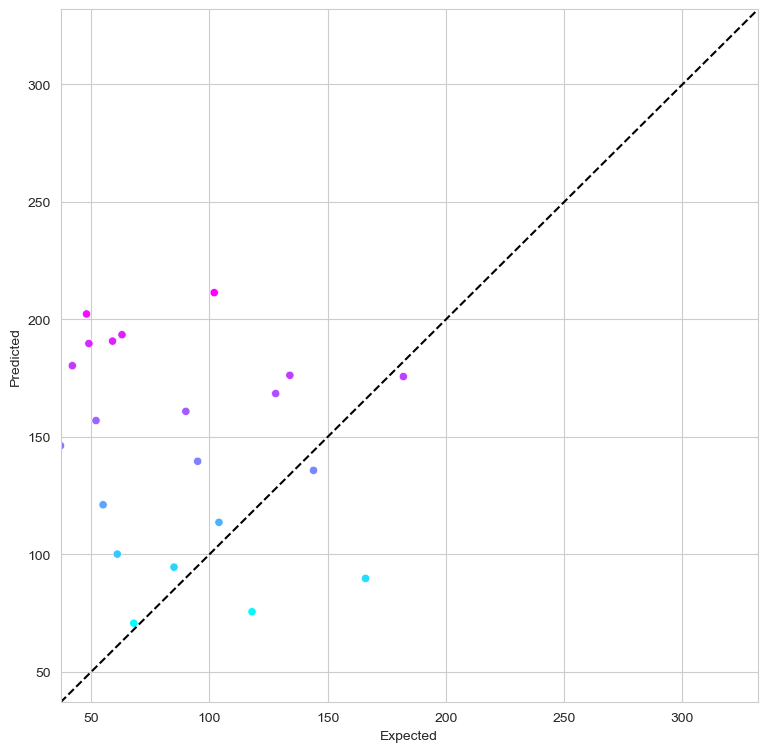

In [126]:
import requests
import csv
import pandas as pd

url = 'https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt'
response = requests.get(url)

if response.status_code == 200:
    text_data = response.text

    lines = text_data.splitlines()
    headers = lines[0].split() 
    rows = []

    for line in lines[1:]:
        row = line.split()
        rows.append(row)

    csv_filename = 'diabetes.tab.txt'

    with open(csv_filename, mode='w', newline='', encoding='utf-8') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(headers)  # Write the headers to the CSV file
        writer.writerows(rows)    # Write the rows to the CSV file

    df = pd.read_csv(csv_filename)

    from sklearn.datasets import load_diabetes
    from sklearn.linear_model import LinearRegression
    import matplotlib.pyplot as plt
    import seaborn as sns


    X = df[['AGE', 'SEX', 'BMI', 'BP']]
    y = df['Y']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=11)

    linear_regression = LinearRegression()

    linear_regression.fit(X = X_train, y = y_train)
    
    for i, name in enumerate(X):
        print(f'{name:>10}: {linear_regression.coef_[i]}')
    
    predicted = linear_regression.predict(X_test)

    expected = y_test

    predicted[:5]
    expected[:5]

    df = pd.DataFrame()
    df['Expected'] = pd.Series(expected)
    df['Predicted'] = pd.Series(predicted)

    figure = plt.figure(figsize=(9, 9))

    axes = sns.scatterplot(data = df, x = 'Expected', y= 'Predicted',
                           hue='Predicted', palette='cool', legend=False)
    
    start = min(expected.min(), predicted.min())

    end = max(expected.max(), predicted.max())

    axes.set_xlim(start, end)

    axes.set_ylim(start, end)

    line = plt.plot([start, end], [start, end], 'k--')

    from sklearn import metrics

    score = metrics.r2_score(expected, predicted)

    print(f'Metrics Score: {score}')

    from sklearn.linear_model import ElasticNet, Lasso, Ridge

    estimators = {
        'LinearRegression' : linear_regression,
        'ElasticNet': ElasticNet(),
        'Lasso' : Lasso(),
        'Ridge' : Ridge()
    }

    result = []

    for model_name, model in estimators.items():
        model.fit(X_train, y_train)

        y_pred = model.predict(X_test)

        metricsStore = metrics.r2_score(y_test, y_pred)

        result.append(metricsStore)

    count = 0
    for model_name, model in estimators.items():
        print(f"Name: {model_name}\nMetrics Score: {result[count]:.3f}")
        count += 1

    from sklearn.model_selection import KFold, cross_val_score

    for estimator_name, estimator_object in estimators.items():
        kfold = KFold(n_splits=10, random_state=11, shuffle=True)
        scores = cross_val_score(estimator=estimator_object, 
        X=X, y=y, cv=kfold,
        scoring='r2')
        print(f'{estimator_name:>16}: ' + 
          f'mean of r2 scores={scores.mean():.3f}')
    